In [1]:
import pandas as pd
import csv
import os
import json
import numpy as np
from citipy import citipy
import requests
import matplotlib.pyplot as plt


In [2]:
os.chdir(r"C:\Users\Yanwho\OneDrive\Documents\python-api-challenge")

In [3]:
from config import api_key

In [4]:
from datetime import date

today = date.today()

d1 = today.strftime("%m/%d/%Y")
print("Today's Date:", d1)

Today's Date: 01/15/2021


In [5]:
# create list of random latitudes evenly distributed across globe

lat = np.random.uniform(low=-90.000, high=90.000, size=2000)

In [6]:
# create list of random longitudes evenly distributed across globe

long = np.random.uniform(low=-180.000, high=180.000, size=2000)

In [7]:
# combine lat and long

latlong = zip(lat, long)

In [8]:
# create list of latitude and longitude combinations 

coordinates=list(latlong)

In [9]:
latlong

In [10]:
coordinates

[(46.08934446982758, 88.43891017879048),
 (-38.273933217097095, 89.6953144413286),
 (-14.928362611907161, -113.97617016313654),
 (-86.66718617867521, -126.47372760065909),
 (30.28279556959798, 140.29813023761034),
 (-55.14713222487122, 145.21988045003326),
 (-17.74560903633646, -34.77683698283818),
 (74.17460128505738, 133.48142215218058),
 (63.10100209424476, -167.59165407579064),
 (-44.293633434332854, 70.13324154768563),
 (47.567986082087, -23.351655418810935),
 (-32.378990764432324, 106.4138380280047),
 (-77.97217965893336, -124.54515797366787),
 (84.00576465000483, 49.27150551935159),
 (-84.74532363398056, -0.3278327860932393),
 (-15.698366652790995, -12.051458985436398),
 (48.87571921997849, -155.10565511465626),
 (-40.33972460254593, -96.42994078329357),
 (49.409337259957596, -172.30804732835944),
 (57.166651092747856, -25.33497315259376),
 (-7.2497642476059525, 59.86311298691578),
 (-24.86348977880145, -29.95716973086357),
 (75.43880995287532, -125.52558663677604),
 (-37.425866

In [9]:
# create empty lists to be populated in loops

cities=[]

city_name=[]
city_id=[]
latitude=[]
longitude=[]
max_temp=[]
humidity=[]
wind_speed=[]
cloudiness=[]

In [10]:
# populate cities list

for x in coordinates:
    city = citipy.nearest_city(x[0],x[1]).city_name
    if city not in cities:
        cities.append(city)
  

In [11]:
# create vairable for base url to be used when making api calls

url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial"
# city = []



In [12]:
# loop through city names and create unique api calls for each city
# populate lists for desired fields from returned json
# skip cities that so not result in a successful api call

for city in cities:

    query_url = url + "&appid=" + api_key + "&q=" + city
    weather_response = requests.get(query_url).json()

    try:
        city_name.append(weather_response["name"])
        city_id.append(weather_response["id"])
        latitude.append(weather_response["coord"]["lat"])
        longitude.append(weather_response["coord"]["lon"])
        max_temp.append(weather_response["main"]["temp_max"])
        humidity.append(weather_response["main"]["humidity"])
        wind_speed.append(weather_response["wind"]["speed"])
        cloudiness.append(weather_response["clouds"]["all"])
        print(city, "success")
    except:
        print(city, "CITY NOT FOUND!")
    pass


mataura success
kapaa success
aswan success
ewa beach success
punta arenas success
port elizabeth success
nanortalik success
dongsheng success
camacha success
chokurdakh success
saskylakh success
vaitupu CITY NOT FOUND!
muros success
grand gaube success
port alfred success
rikitea success
galgani CITY NOT FOUND!
new norfolk success
san patricio success
sao joao da barra success
akdagmadeni success
uvira success
kijang success
roald success
aranos success
nikolskoye success
cabo san lucas success
kokstad success
oistins success
qaanaaq success
dingle success
busselton success
barentsburg CITY NOT FOUND!
nizhneyansk CITY NOT FOUND!
marfino success
bredasdorp success
rawlins success
illoqqortoormiut CITY NOT FOUND!
port lincoln success
grindavik success
thompson success
tongzi success
lebu success
winona success
mar del plata success
nhulunbuy success
stavrovo success
hobart success
richards bay success
pahrump success
lavrentiya success
raudeberg success
namatanai success
chuy success
sa

In [13]:
# create pandas dataframe from lists populated by series of api calls

results_df=pd.DataFrame({"City":pd.Series(city_name), 
                         "ID":pd.Series(city_id),
                         "Latitude":pd.Series(latitude), 
                         "Longitude":pd.Series(longitude), 
                         "Max Temp":pd.Series(max_temp), 
                         "Humidity":pd.Series(humidity), 
                         "Wind Speed":pd.Series(wind_speed),
                         "Cloudiness":pd.Series(cloudiness)
                        })

results_df

,City,ID,Latitude,Longitude,Max Temp,Humidity,Wind Speed,Cloudiness
0,Mataura,6201424,-46.1927,168.8643,68.00,77,3.00,48
1,Kapaa,5848280,22.0752,-159.3190,77.00,78,9.22,90
2,Aswān,359792,24.0934,32.9070,56.75,46,10.56,44
3,‘Ewa Beach,5855051,21.3156,-158.0072,78.80,65,5.75,1
4,Punta Arenas,3874787,-53.1500,-70.9167,57.20,67,10.36,0
...,...,...,...,...,...,...,...,...
698,Karpogory,552256,64.0019,44.4451,-10.95,89,4.05,100
699,Kochevo,546845,59.5994,54.3125,8.04,95,9.53,100
700,Salta,3838233,-24.7859,-65.4117,78.80,57,6.91,40
701,Rawson,3839307,-43.3002,-65.1023,78.80,53,17.27,75


In [14]:
# export dataframe to a csv file

results_df.to_csv("results.csv")

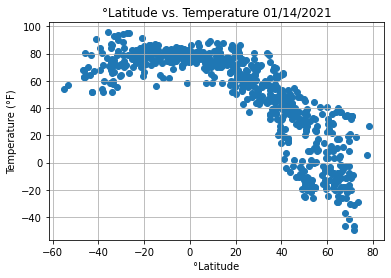

In [15]:
plt.scatter(results_df["Latitude"], results_df["Max Temp"])
plt.title(f"°Latitude vs. Temperature {d1}")
plt.ylabel("Temperature (°F)")
plt.xlabel("°Latitude")
plt.grid(True)

plt.savefig("figures/max_temp.png")

<h1> °Latitude vs. Temperature <h1>
<h3>Not surprisingly, the highest temeratures are nearest the equator.  Since nearly 70% of the planets land is in the northern hemisphere, it makes sense that there are significantly fewer data points in the southern hemisphere.  The seasonal tilt of the Earths axis likely is the cause for relatively higher temps in the south compared to the north.<h3>

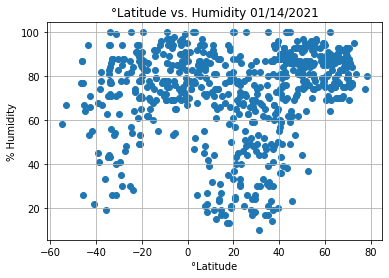

In [16]:
plt.scatter(results_df["Latitude"], results_df["Humidity"])
plt.title(f"°Latitude vs. Humidity {d1}")
plt.ylabel("% Humidity")
plt.xlabel("°Latitude")
plt.grid(True)

plt.savefig("figures/humidity.png")

<h1> °Latitude vs. Humidity <h1>
<h3>Beyond a slight concentration of zero humidity locations, there appears to be little correlation between latitude and humidity levels.<h3>

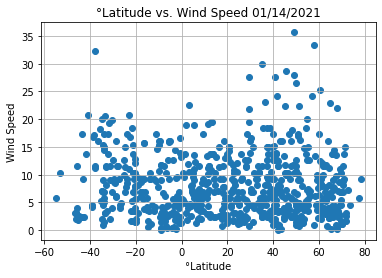

In [17]:
plt.scatter(results_df["Latitude"], results_df["Wind Speed"])
plt.title(f"°Latitude vs. Wind Speed {d1}")
plt.ylabel("Wind Speed")
plt.xlabel("°Latitude")
plt.grid(True)

plt.savefig("figures/wind_speed.png")

<h1> °Latitude vs. Wind Speed <h1>
<h3>Althought the extreme northern latitudes do indicate an increased possibility of some of the higher wind speeds, most of the data indicates little correlation. It is important to note that we lack data points from the extreme southern latitudes that may better bring this significance into focus<h3>

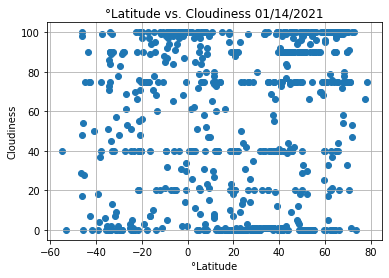

In [18]:
plt.scatter(results_df["Latitude"], results_df["Cloudiness"])
plt.title(f"°Latitude vs. Cloudiness {d1}")
plt.ylabel("Cloudiness")
plt.xlabel("°Latitude")
plt.grid(True)

plt.savefig("figures/cloudiness.png")

<h1> °Latitude vs. Cloudiness <h1>
<h3>There appears to be no significant direct correlation between latitude and cloudiness.s<h3>

In [19]:
# create dataframe of cities in the northern hemisphere

north_hem = results_df.Latitude >= 0
north_df = results_df[north_hem]
north_df
# north_df.to_csv("north_df.csv")

,City,ID,Latitude,Longitude,Max Temp,Humidity,Wind Speed,Cloudiness
1,Kapaa,5848280,22.0752,-159.3190,77.00,78,9.22,90
2,Aswān,359792,24.0934,32.9070,56.75,46,10.56,44
3,‘Ewa Beach,5855051,21.3156,-158.0072,78.80,65,5.75,1
6,Nanortalik,3421765,60.1432,-45.2371,22.35,94,4.43,95
7,Dongsheng,1812256,39.8161,109.9776,14.50,80,17.36,41
...,...,...,...,...,...,...,...,...
696,Ca Mau,1586443,9.1769,105.1500,69.87,90,3.53,98
697,Chelno-Vershiny,569497,54.4333,51.1000,11.05,96,13.65,100
698,Karpogory,552256,64.0019,44.4451,-10.95,89,4.05,100
699,Kochevo,546845,59.5994,54.3125,8.04,95,9.53,100


In [20]:
# create dataframe of cities in the southern hemisphere

south_hem = results_df.Latitude < 0
south_df = results_df[south_hem]
south_df
# south_df.to_csv("south_df.csv")

,City,ID,Latitude,Longitude,Max Temp,Humidity,Wind Speed,Cloudiness
0,Mataura,6201424,-46.1927,168.8643,68.00,77,3.00,48
4,Punta Arenas,3874787,-53.1500,-70.9167,57.20,67,10.36,0
5,Port Elizabeth,964420,-33.9180,25.5701,69.80,100,17.27,90
12,Grand Gaube,934479,-20.0064,57.6608,75.00,84,1.99,56
13,Port Alfred,964432,-33.5906,26.8910,75.11,86,20.51,89
...,...,...,...,...,...,...,...,...
687,Imbituba,3461370,-28.2400,-48.6703,71.60,88,11.50,90
690,Vaitape,4033077,-16.5167,-151.7500,81.50,76,15.70,7
693,Vanimo,2084442,-2.6741,141.3028,78.35,84,5.57,100
700,Salta,3838233,-24.7859,-65.4117,78.80,57,6.91,40


In [21]:
from scipy import stats

def stats_linregress(x,y):
    res = stats.linregress(x,y)
    plt.plot(x, y, "+", label="Cities")
    plt.plot(x, res.intercept + res.slope* x, "r", label="Linear Regression", color="magenta")
    plt.legend()
    plt.xlabel("°Latitude")
    print(f"R-squared: {res.rvalue**2:.6f}")
#     plt.show()

# res = stats.linregress(south_df["Latitude"], south_df["Wind Speed"])

R-squared: 0.731295


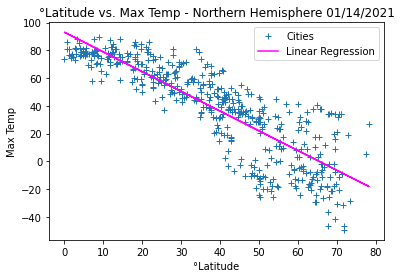

In [30]:
north_temp = stats_linregress(north_df["Latitude"], north_df["Max Temp"])
plt.title(f"°Latitude vs. Max Temp - Northern Hemisphere {d1}")
plt.ylabel("Max Temp")
plt.savefig("figures/north_temp.png")
# plt.show()


R-squared: 0.136635


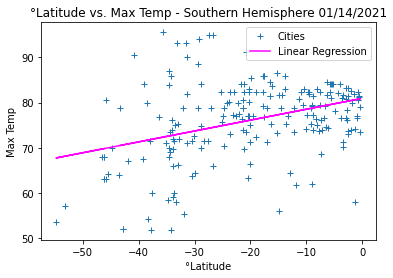

In [31]:
south_temp = stats_linregress(south_df["Latitude"], south_df["Max Temp"])
plt.title(f"°Latitude vs. Max Temp - Southern Hemisphere {d1}")
plt.ylabel("Max Temp")
# plt.show()
plt.savefig("figures/south_temp.png")

<h2>°Latitude vs. Max Temp<h2>
<img src="../figures/north_temp.png" height:50px/>
<img src="../figures/south_temp.png" height:50px/>
<h3>There is a much tighter coorelation to betweem max temp and latitude in the northern hemisphere.  This is likely due to the amount of data points and the relative diversity of the land dispersion in the southern hemisphere.<h3>


R-squared: 0.108109


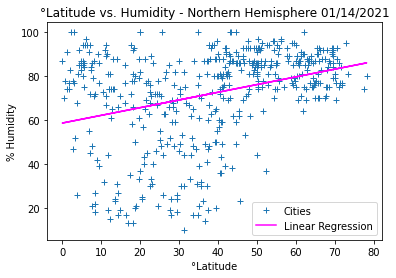

In [32]:
north_humidity = stats_linregress(north_df["Latitude"], north_df["Humidity"])
plt.title(f"°Latitude vs. Humidity - Northern Hemisphere {d1}")
plt.ylabel("% Humidity")
plt.savefig("figures/north_humidity.png")
# plt.show()

R-squared: 0.117746


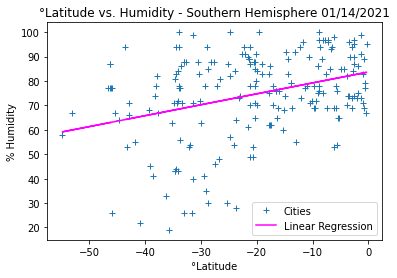

In [33]:
south_humidity = stats_linregress(south_df["Latitude"], south_df["Humidity"])
plt.title(f"°Latitude vs. Humidity - Southern Hemisphere {d1}")
plt.ylabel("% Humidity")
plt.savefig("figures/south_humidity.png")
# plt.show()


<h2>°Latitude vs. Humidity<h2>
<img src="../figures/north_humidity.png" height:50px/>
<img src="../figures/south_humidity.png" height:50px/>
<h3>Although there is a a loose coorelation between latitude and humidity, and that the coorelation is similiar between the hemispheres, nearly all levels of humidity are present at all latitudes.<h3>

R-squared: 0.000741


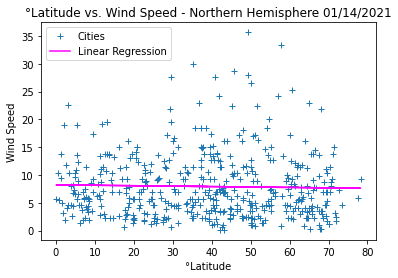

In [34]:
north_wind = stats_linregress(north_df["Latitude"], north_df["Wind Speed"])
plt.title(f"°Latitude vs. Wind Speed - Northern Hemisphere {d1}")
plt.ylabel("Wind Speed")
plt.savefig("figures/north_wind.png")
# plt.show()

R-squared: 0.037889


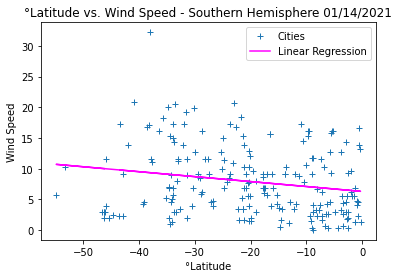

In [35]:
south_wind = stats_linregress(south_df["Latitude"], south_df["Wind Speed"])
plt.title(f"°Latitude vs. Wind Speed - Southern Hemisphere {d1}")
plt.ylabel("Wind Speed")
plt.savefig("figures/south_wind.png")
# plt.show()


<h2>°Latitude vs. Wind Speed<h2>
<img src="../figures/north_wind.png" height:50px/>
<img src="../figures/south_wind.png" height:50px/>
<h3>There is not a notable coorelation between latitude and wind speed.<h3>

R-squared: 0.070842


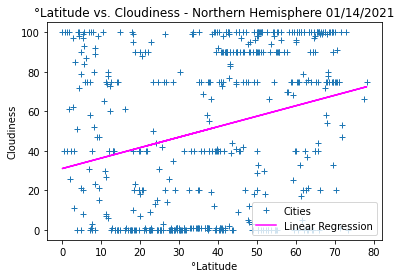

In [36]:
north_cloudiness = stats_linregress(north_df["Latitude"], north_df["Cloudiness"])
plt.title(f"°Latitude vs. Cloudiness - Northern Hemisphere {d1}")
plt.ylabel("Cloudiness")
plt.savefig("figures/north_cloudiness.png")
# plt.show()

R-squared: 0.125829


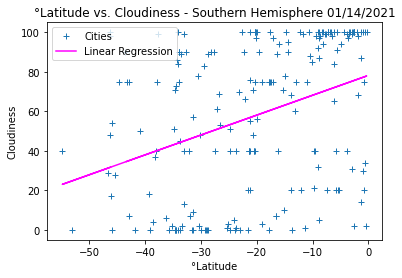

In [37]:
south_cloudiness = stats_linregress(south_df["Latitude"], south_df["Cloudiness"])
plt.title(f"°Latitude vs. Cloudiness - Southern Hemisphere {d1}")
plt.ylabel("Cloudiness")
plt.savefig("figures/south_cloudiness.png")
# plt.show()


<h2>°Latitude vs. Cloudiness<h2>
<img src="../figures/north_cloudiness.png" height:50px/>
<img src="../figures/south_cloudiness.png" height:50px/>
<h3>There is not a notable coorelation between latitude and cloudiness.<h3>

In [45]:

results_df_filtered = results_df[(results_df["Max Temp"] <80) & (results_df["Max Temp"] >70) & (results_df["Wind Speed"] <10) & (results_df["Cloudiness"] == 0)]
results_df_filtered

,City,ID,Latitude,Longitude,Max Temp,Humidity,Wind Speed,Cloudiness
49,Salalah,286621,17.0151,54.0924,77.00,13,9.22,0
93,Makkah al Mukarramah,104515,21.4267,39.8261,73.24,77,4.14,0
161,Oussouye,2246901,12.4850,-16.5469,78.80,61,2.30,0
188,Yenagoa,2318123,4.9247,6.2642,76.86,86,6.55,0
250,Arlit,2447513,18.7369,7.3853,72.36,20,7.83,0
289,Keïta,2442478,14.7551,5.7749,75.20,19,2.30,0
298,Machilipatnam,1264637,16.1667,81.1333,72.41,85,2.59,0
303,San Quintín,3984997,30.4833,-115.9500,71.02,30,6.93,0
326,Guerrero Negro,4021858,27.9769,-114.0611,76.33,17,5.35,0
365,Recreio,3451750,-21.5250,-42.4692,76.33,90,5.30,0
